In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import polars as pl
import networkx as nx

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network
from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions,
    get_mirna_gene_interactions,
    gg_interactions,
    pp_interactions,
    tf_links
)
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [4]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=60,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

/home/lubojjan/DiplomaThesis2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-05 14:46:19,401] A new study created in memory with name: no-name-f18aa651-5123-4836-8519-c707329e0f5f
[I 2024-12-05 14:46:19,680] Trial 0 finished with value: 0.4960685702412563 and parameters: {'booster': 'gbtree', 'lambda': 0.504886710345983, 'alpha': 2.847669624231654e-06, 'max_depth': 7, 'eta': 4.830693391929292e-07, 'gamma': 6.555121280388983e-07, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.4960685702412563.
[I 2024-12-05 14:46:19,835] Trial 1 finished with value: 0.7039337563024542 and parameters: {'booster': 'gblinear', 'lambda': 0.15433438254335488, 'alpha': 0.00021201706611652583}. Best is trial 1 with value: 0.7039337563024542.


New best score: 0.496
Best model performance:
Accuracy: 0.851 ± 0.050
F1 Macro: 0.693 ± 0.140
F1 Weighted: 0.841 ± 0.053
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.8, 'f1_macro': np.float64(0.7204968944099379), 'f1_weighted': np.float64(0.8099378881987577)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8, 'f1_macro': np.float64(0.4444444444444444), 'f1_weighted': np.float64(0.7703703703703704)}, {'acc': 0.8571428571428571, 'f1_macro': np.float64(0.7083333333333333), 'f1_weighted': np.float64(0.8571428571428571)}]
New best score: 0.704
Best model performance:
Accuracy: 0.920 ± 0.050
F1 Macro: 0.840 ± 0.097
F1 Weighted: 0.911 ± 0.056
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, 

[I 2024-12-05 14:46:20,008] Trial 2 finished with value: 0.6022120594382817 and parameters: {'booster': 'gblinear', 'lambda': 5.715787735212562e-06, 'alpha': 0.00416653206850071}. Best is trial 1 with value: 0.7039337563024542.
[I 2024-12-05 14:46:20,243] Trial 3 finished with value: 0.4546641166247335 and parameters: {'booster': 'gbtree', 'lambda': 0.0005272069409569335, 'alpha': 8.474002657455282e-07, 'max_depth': 7, 'eta': 0.0002476550535458936, 'gamma': 0.002585382723093902, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.7039337563024542.
[I 2024-12-05 14:46:20,405] Trial 4 finished with value: 0.27794757275052406 and parameters: {'booster': 'gblinear', 'lambda': 0.7046272036373515, 'alpha': 0.48194123885889245}. Best is trial 1 with value: 0.7039337563024542.
[I 2024-12-05 14:46:20,640] Trial 5 finished with value: 0.0013903478254046716 and parameters: {'booster': 'gbtree', 'lambda': 5.579351892301826e-07, 'alpha': 0.0002000719539656055, 'max_depth': 9, 'eta': 1.383617

New best score: 0.806
Best model performance:
Accuracy: 0.946 ± 0.027
F1 Macro: 0.904 ± 0.048
F1 Weighted: 0.944 ± 0.028
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-12-05 14:46:22,084] Trial 13 finished with value: 0.806425114231087 and parameters: {'booster': 'gblinear', 'lambda': 0.0017114911333558978, 'alpha': 1.2494870392956649e-05}. Best is trial 11 with value: 0.806425114231087.
[I 2024-12-05 14:46:22,248] Trial 14 finished with value: 0.6460639796087643 and parameters: {'booster': 'gblinear', 'lambda': 0.0055281739529511875, 'alpha': 0.021742654569418693}. Best is trial 11 with value: 0.806425114231087.
[I 2024-12-05 14:46:22,402] Trial 15 finished with value: 0.806425114231087 and parameters: {'booster': 'gblinear', 'lambda': 0.0002108768898140414, 'alpha': 2.3965760207255512e-05}. Best is trial 11 with value: 0.806425114231087.
[I 2024-12-05 14:46:22,682] Trial 16 finished with value: 0.4546641166247335 and parameters: {'booster': 'dart', 'lambda': 0.02665976815626025, 'alpha': 3.71233034729464e-08, 'max_depth': 4, 'eta': 4.799155915315962e-06, 'gamma': 1.119030384825703e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', '

New best score: 0.852
Best model performance:
Accuracy: 0.960 ± 0.033
F1 Macro: 0.928 ± 0.059
F1 Weighted: 0.957 ± 0.035
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-12-05 14:46:23,266] Trial 19 finished with value: 0.0013903478254046716 and parameters: {'booster': 'dart', 'lambda': 0.02759059655680231, 'alpha': 1.1477587916155893e-07, 'max_depth': 4, 'eta': 1.304997951297594e-08, 'gamma': 0.6365895290348214, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.9311433948628378e-08, 'skip_drop': 1.0284536123633402e-08}. Best is trial 18 with value: 0.8523939840000002.
[I 2024-12-05 14:46:23,436] Trial 20 finished with value: 0.7362098798554709 and parameters: {'booster': 'gblinear', 'lambda': 3.9817392134423736e-05, 'alpha': 3.664666430658827e-06}. Best is trial 18 with value: 0.8523939840000002.
[I 2024-12-05 14:46:23,602] Trial 21 finished with value: 0.8523939840000002 and parameters: {'booster': 'gblinear', 'lambda': 0.002637023203640302, 'alpha': 1.5252715636652212e-07}. Best is trial 18 with value: 0.8523939840000002.
[I 2024-12-05 14:46:23,754] Trial 22 finished with value: 0.806425114231087

Best model performance:
Accuracy: 0.960 ± 0.033
F1 Macro: 0.928 ± 0.059
F1 Weighted: 0.957 ± 0.035
Best hyperparameters:
{'booster': 'gblinear', 'lambda': 0.004961974151965213, 'alpha': 2.071799572989995e-07}


In [5]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}
{'ENSG00000181826': [0.0517459511756897, -0.051434509456157684], 'ENSG00000278588': [0.048966288566589355, -0.048192985355854034], 'ENSG00000120594': [0.03568648919463158, -0.034452613443136215], 'ENSG00000121797': [-0.048830412328243256, 0.04716459661722183], 'ENSG00000140398': [0.04870244115591049, -0.05393906310200691], 'ENSG00000168062': [-0.0642709732055664, 0.061569493263959885], 'ENSG00000174307': [-0.06204689294099808, 0.06374660134315491], 'ENSG00000184897': [0.0399300642311573, -0.04207117110490799], 'ENSG00000105497': [-0.04444887116551399, 0.04606335610151291], 'ENSG00000113552': [-0.06064941734075546, 0.060939721763134], 'ENSG00000188536': [-0.06200219690799713, 0.05921405553817749], 'ENSG00000181004': [-0.0416993647813797, 0.04247047007083893], 'ENSG00000143590': [-0.06272099912166595, 0.06185348331928253], 'ENSG00000006534': [-0.05326072499155998, 0.05498214066028595], 'ENSG000001

In [6]:
fi_sorted['hsa_circ_0005325']

0.8990941494703293

In [7]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

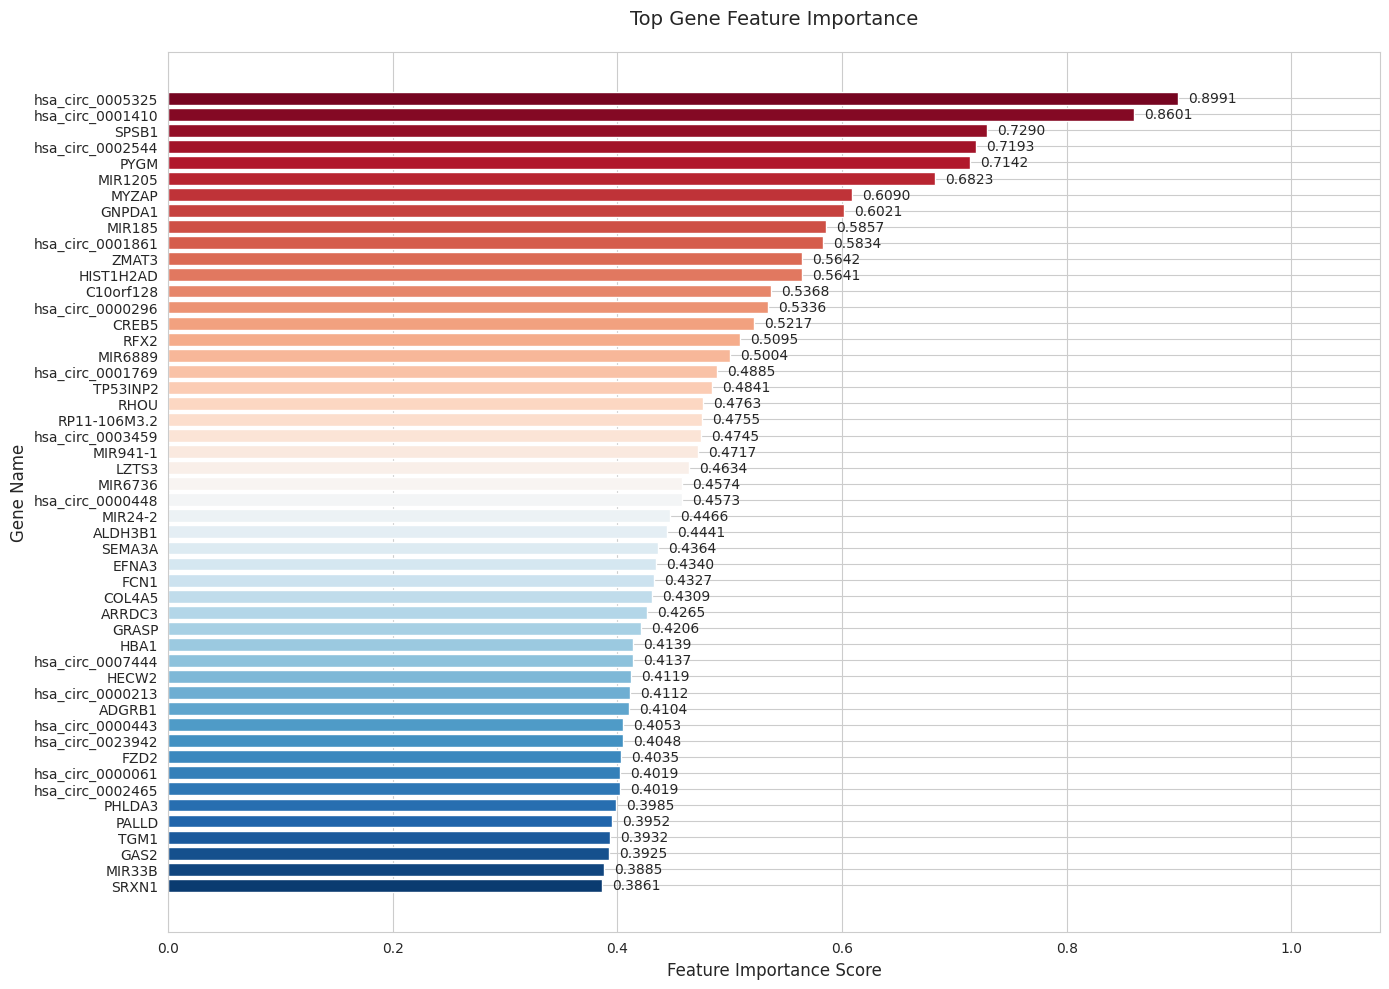

In [8]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(fi_nn, n_genes=50, title="Top Genes", save_file=None)

- [hsa_circ_0005325 significantly upregulated in colorectal cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC10952939/)
- []()

In [61]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
n_top_genes = 40
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

In [62]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
tf_links_A = tf_links(
    mrna_genes,
    mrna_genes,
    # tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_SS_simpleFormat_v1.0.tsv",
    tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_LS_simpleFormat_v1.0.tsv",
)
mrna_A = torch.logical_or(gg_A, pp_A).logical_or(tf_links_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum() - mrna_A.trace(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(53), tensor(28.), tensor(14.))

2799


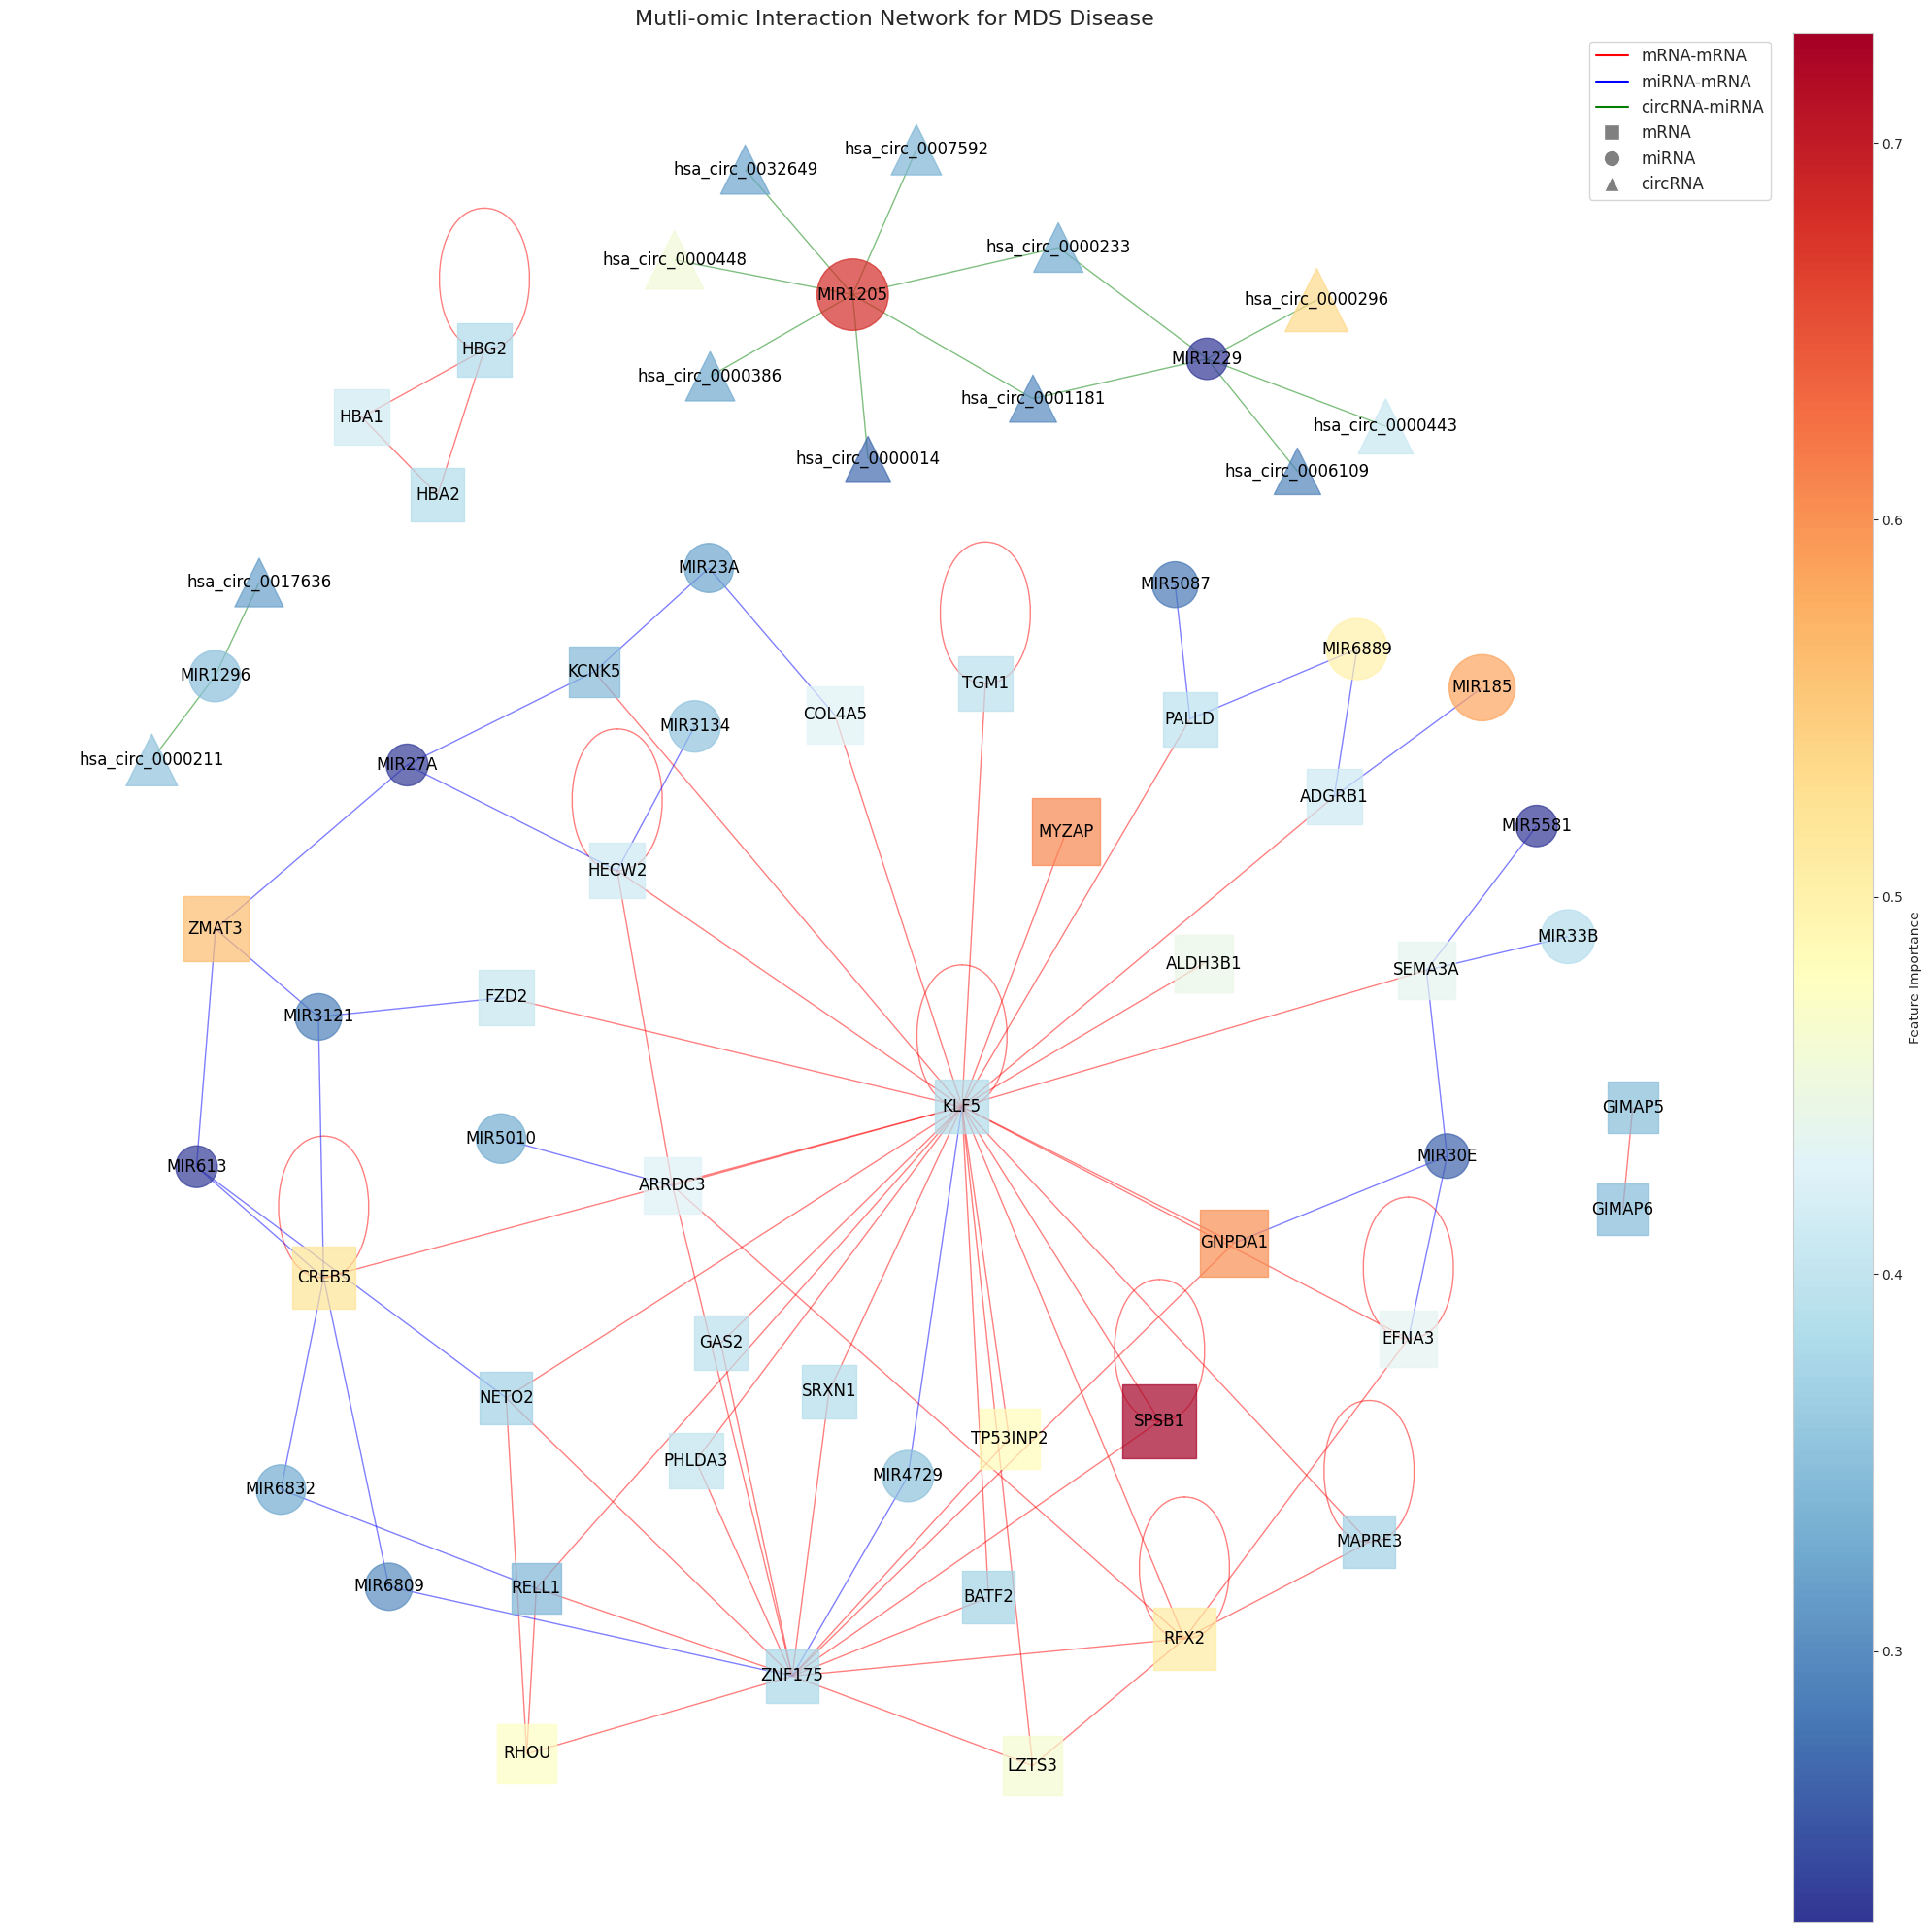

In [63]:
# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# we can also save graph for cytoscape
# nx.write_graphml(G, "plots/disease/disease_multi_omic_network.graphml")

# generate a random number
seed = np.random.randint(0, 10000)
print(seed)

fig = plot_multi_omic_network(
    G,
    seed=seed, 
    title="Mutli-omic Interaction Network for MDS Disease",
    figsize=(20,20),
    max_iter=500,
)
# plt.show()
fig.savefig('plots/disease/disease_multi_omic_network_all_factors_40.png', dpi=100)

- [MiR-570 inhibits cell proliferation and glucose metabolism by targeting IRS1 and IRS2 in human chronic myelogenous leukemia](https://pmc.ncbi.nlm.nih.gov/articles/PMC5478775/)
- MIR1205 has been implicated to serve a function in other types of cancer https://www.nature.com/articles/s41419-019-2154-4, as a tumor suppressor in lung cancer https://pmc.ncbi.nlm.nih.gov/articles/PMC6405972/, breast cancer https://www.sciencedirect.com/science/article/abs/pii/S0898656824002328, gastric cancer https://www.sciencedirect.com/science/article/pii/S2162253120301335
- has_circr_0000489 reported upregulated in liver cancer https://turkjgastroenterol.org/Content/files/sayilar/391/TJG_April_2023%20(1)-92-104.pdf
- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/), RELL1 identified as an oncogene in glioma cancer https://pubmed.ncbi.nlm.nih.gov/32683297/, RELT protein expression was detected in the spleen, lymph node, brain, breast and peripheral blood leukocytes (PBLs). A smaller than expected size of RELT was observed in PBLs, suggesting a proteolytically cleaved form of RELT.
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)
- [PYGM is a glycogen gene, this study mentions the role of that in cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC7667517/)
- [TUBB is a good biomarker](https://www.frontiersin.org/journals/molecular-biosciences/articles/10.3389/fmolb.2024.1365655/full)
- hsa_circr_0005325 implicated to serve a function in cervical cancer https://pmc.ncbi.nlm.nih.gov/articles/PMC9884480/, bladder cancer, and AML https://www.researchgate.net/publication/370139513_A_Bioinformatics_Analysis_of_circRNAmiRNAmRNA_Interactions_in_Acute_Myeloid_Leukemia
- [CREB5 identified as biomarker in multiple types of cancer including AML](https://www.sciencedirect.com/science/article/pii/S0010482524003913), [CREB5 glioma cancer](https://www.nature.com/articles/s41420-024-01873-z), [CREB5 in hepatocellular cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC6962929/)
- [GNPDA1 leads to poor prognosis in hepatocellular carcinoma](https://pubmed.ncbi.nlm.nih.gov/32606980/), and in [kidney cancer](https://www.proteinatlas.org/ENSG00000113552-GNPDA1) 

In [64]:
import gseapy as gp

mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

n_top_genes = 100
mrna_dict_enrich = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mrna_genes_enrich = list(mrna_dict.keys())

for g in mrna_genes:
    print(g)

SPSB1
PYGM
MYZAP
GNPDA1
ZMAT3
HIST1H2AD
C10orf128
CREB5
RFX2
TP53INP2
RHOU
RP11-106M3.2
LZTS3
ALDH3B1
SEMA3A
EFNA3
FCN1
COL4A5
ARRDC3
GRASP
HBA1
HECW2
ADGRB1
FZD2
PHLDA3
PALLD
TGM1
GAS2
SRXN1
HBA2
KLF5
HBG2
ZNF175
BATF2
MAPRE3
NETO2
GIMAP5
GIMAP6
KCNK5
RELL1


In [ ]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=mrna_genes_enrich, # or "./tests/data/gene_list.txt",
    gene_sets=['BioPlanet_2019','KEGG_2021_Human', 'Elsevier_Pathway_Collection', 'WikiPathways_2024_Human', 'Reactome_Pathways_2024'],
    organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
    outdir=None, # don't write to disk
)

Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
str,str,str,f64,f64,i64,i64,f64,f64,str
"""BioPlanet_2019""","""Oxygen/carbon dioxide exchange…","""5/8""",1.6224e-7,0.000093,0,0,83.117048,1299.467464,"""HBB;RHAG;SLC4A1;HBA1;AQP1"""
"""BioPlanet_2019""","""Alpha-hemoglobin stabilizing e…","""5/13""",0.000003,0.00098,0,0,31.160941,392.06138,"""ALAS2;CPOX;HBB;HBA2;HBA1"""
"""BioPlanet_2019""","""Systemic lupus erythematosus""","""12/139""",0.000022,0.004273,0,0,4.767247,51.029937,"""HIST1H2AM;C1QB;HLA-DRB5;HIST1H…"
"""BioPlanet_2019""","""Primary immunodeficiency""","""6/35""",0.00006,0.0085,0,0,10.330577,100.503417,"""CD79A;IGLL1;CD19;TNFRSF13C;RAG…"
"""BioPlanet_2019""","""TGF-beta regulation of extrace…","""25/565""",0.000181,0.020647,0,0,2.365952,20.390079,"""KCNE3;SEMA3A;LPAR1;TNFAIP2;TNF…"
…,…,…,…,…,…,…,…,…,…
"""Elsevier_Pathway_Collection""","""Hodgkin and Reed-Sternberg Cel…","""4/23""",0.001013,0.04489,0,0,10.463799,72.14144,"""SOCS1;POU2AF1;EBF1;PAX5"""
"""WikiPathways_2024_Human""","""Extrafollicular And Follicular…","""9/74""",0.000016,0.005947,0,0,6.954044,76.892213,"""CD79A;MAF;IRF4;CD19;CXCR4;PAX5…"
"""Reactome_Pathways_2024""","""Erythrocytes Take up Oxygen an…","""5/8""",1.6224e-7,0.000106,0,0,83.117048,1299.467464,"""HBB;RHAG;SLC4A1;HBA1;AQP1"""


In [94]:
# select by Adjusted P-value < 0.05
results = pl.DataFrame(enr.results)
significant_results = results.filter(pl.col("Adjusted P-value") < 0.05)

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=200, set_tbl_formatting='ASCII_FULL'):
    print(significant_results)

shape: (31, 10)
+-----------------------------+------------------------------+---------+-----------+------------------+-------------+----------------------+------------+----------------+-----------------------------+
| Gene_set                    | Term                         | Overlap | P-value   | Adjusted P-value | Old P-value | Old Adjusted P-value | Odds Ratio | Combined Score | Genes                       |
| ---                         | ---                          | ---     | ---       | ---              | ---         | ---                  | ---        | ---            | ---                         |
| str                         | str                          | str     | f64       | f64              | i64         | i64                  | f64        | f64            | str                         |
+===================================================================================================================================================================================